<a href="https://colab.research.google.com/github/ran-cao/Creditcard-Fraud-Anomaly-Detection/blob/master/GLM%26AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount= True)

Mounted at /content/gdrive


In [ ]:
loan_data = pd.read_csv('/content/gdrive/My Drive/anomaly detection/XYZloan_default_selected_vars.csv')

In [ ]:
loan_data.head(5)

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,AP007,AP008,AP009,TD001,TD002,TD005,TD006,TD009,TD010,TD013,TD014,TD015,TD022,TD023,TD024,TD025,TD026,TD027,TD028,TD029,TD044,TD048,TD051,TD054,TD055,TD061,TD062,CR004,CR005,CR009,...,PA030,PA031,CD008,CD018,CD071,CD072,CD088,CD100,CD101,CD106,CD107,CD108,CD113,CD114,CD115,CD117,CD118,CD120,CD121,CD123,CD130,CD131,CD132,CD133,CD135,CD136,CD137,CD152,CD153,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,3,3,1,1,1,4,1,5,1,14,2,2,10.0,9.0,6.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,35807,...,-98.0,-98.0,13840.0,172.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,57.0,48.0,95.0,79.0,125.0,103.0,43.0,55.0,56.0,52.0,65.0,91.0,96.0,10900.0,12757.0,8.0,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,5,4,0,2,0,3,1,3,1,3,2,0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,7254,...,-98.0,-98.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,4,2,0,2,1,4,1,5,1,9,1,2,15.0,9.0,2.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,30377,...,-98.0,-98.0,2454.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,20.0,20.0,23.0,21.0,11.0,9.0,10.0,12.0,13.0,9.0,11.0,3807.0,2314.0,0.0,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,5,5,0,0,0,0,0,0,0,1,1,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0,...,-98.0,-98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,4,4,1,2,0,2,1,2,1,2,1,0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


# Data Preparation

## Part1: Use the raw dataset

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(
     loan_data, test_size=0.40, random_state=42)

In [ ]:
train.shape

(48000, 89)

In [ ]:
var = pd.DataFrame(train.dtypes).reset_index()
var.head()

,index,0
0,Unnamed: 0,int64
1,Unnamed: 0.1,int64
2,id,int64
3,loan_default,int64
4,AP001,int64


In [ ]:
var.columns = ['varname','dtype'] 
var['source'] = var['varname'].str[:2]
var.head()

,varname,dtype,source
0,Unnamed: 0,int64,Un
1,Unnamed: 0.1,int64,Un
2,id,int64,id
3,loan_default,int64,lo
4,AP001,int64,AP


In [ ]:
var['source'].value_counts()

CD    36
TD    24
AP     9
CR     8
PA     6
Un     2
MB     2
lo     1
id     1
Name: source, dtype: int64

In [ ]:
train['AP004'].unique()

array([12,  9,  3,  6])

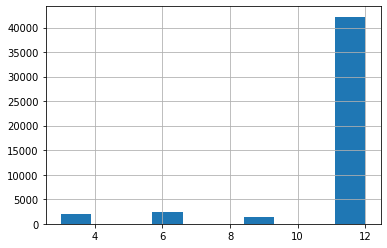

In [ ]:
train['AP004'].hist()

In [ ]:
train['loan_default'].value_counts(dropna=False)

0    38736
1     9264
Name: loan_default, dtype: int64

In [ ]:
MB_list = list(var[var['source']=='MB']['varname'])
AP_list = list(var[var['source']=='AP']['varname'])
TD_list = list(var[var['source']=='TD']['varname'])
CR_list = list(var[var['source']=='CR']['varname'])
PA_list = list(var[var['source']=='PA']['varname'])
CD_list = list(var[var['source']=='CD']['varname'])

In [ ]:
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9" 2020-10-20; OpenJDK Runtime Environment (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.9+11-Ubuntu-0ubuntu1.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_cst1lgp
  JVM stdout: /tmp/tmp_cst1lgp/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_cst1lgp/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_zuzxcs
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


Portion

In [ ]:
train_smpl = train.sample(frac=0.1, random_state=1)
test_smpl = test.sample(frac=0.1, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


Whole Dataset

In [ ]:
df_hex = h2o.H2OFrame(loan_data)
train_hex2 = h2o.H2OFrame(train)
test_hex2 = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


## Part2: Data Cleaning: drop variable, compute NA, Encoding

Drop the time

In [ ]:
loan_data2 = loan_data.drop('AP005',axis=1)

In [ ]:
loan_data2.head(5)

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP006,AP007,AP008,AP009,TD001,TD002,TD005,TD006,TD009,TD010,TD013,TD014,TD015,TD022,TD023,TD024,TD025,TD026,TD027,TD028,TD029,TD044,TD048,TD051,TD054,TD055,TD061,TD062,CR004,CR005,CR009,CR012,...,PA030,PA031,CD008,CD018,CD071,CD072,CD088,CD100,CD101,CD106,CD107,CD108,CD113,CD114,CD115,CD117,CD118,CD120,CD121,CD123,CD130,CD131,CD132,CD133,CD135,CD136,CD137,CD152,CD153,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,ios,3,3,1,1,1,4,1,5,1,14,2,2,10.0,9.0,6.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,35807,0,...,-98.0,-98.0,13840.0,172.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,57.0,48.0,95.0,79.0,125.0,103.0,43.0,55.0,56.0,52.0,65.0,91.0,96.0,10900.0,12757.0,8.0,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,h5,5,4,0,2,0,3,1,3,1,3,2,0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,7254,0,...,-98.0,-98.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,h5,4,2,0,2,1,4,1,5,1,9,1,2,15.0,9.0,2.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,30377,0,...,-98.0,-98.0,2454.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,20.0,20.0,23.0,21.0,11.0,9.0,10.0,12.0,13.0,9.0,11.0,3807.0,2314.0,0.0,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,android,5,5,0,0,0,0,0,0,0,1,1,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0,0,...,-98.0,-98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,h5,4,4,1,2,0,2,1,2,1,2,1,0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,0,0,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


One hot encoding for variable "AP006"

In [ ]:
dummies = pd.get_dummies(loan_data2['AP006'],dummy_na=True)
dummies.head()

,android,api,h5,ios,NaN
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,0,0,1,0,0


In [ ]:
dummies.columns = ['AP006_android', 'AP006_api', 'AP006_h5','AP006_ios','AP006_nan']

In [ ]:
loan_data3 = pd.concat([loan_data2, dummies], axis=1)

In [ ]:
loan_data3.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001', 'TD002',
       'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015', 'TD022',
       'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029', 'TD044',
       'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'CR004', 'CR005',
       'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022', 'PA023',
       'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071', 'CD072',
       'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113', 'CD114',
       'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130', 'CD131',
       'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153', 'CD160',
       'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172', 'CD173',
       'MB005', 'MB007', 'AP006_android', 'AP006_api', 'AP006_h5', 'AP006_ios',
       'AP006_nan'],
      dtype='object')

In [ ]:
loan_data3 = loan_data3.drop(['AP006','AP006_nan'], axis=1)
loan_data3.head(4)

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,TD002,TD005,TD006,TD009,TD010,TD013,TD014,TD015,TD022,TD023,TD024,TD025,TD026,TD027,TD028,TD029,TD044,TD048,TD051,TD054,TD055,TD061,TD062,CR004,CR005,CR009,CR012,CR015,...,CD071,CD072,CD088,CD100,CD101,CD106,CD107,CD108,CD113,CD114,CD115,CD117,CD118,CD120,CD121,CD123,CD130,CD131,CD132,CD133,CD135,CD136,CD137,CD152,CD153,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007,AP006_android,AP006_api,AP006_h5,AP006_ios
0,0,1,1,1,31,2,1,12,3,3,1,1,1,4,1,5,1,14,2,2,10.0,9.0,6.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,35807,0,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,57.0,48.0,95.0,79.0,125.0,103.0,43.0,55.0,56.0,52.0,65.0,91.0,96.0,10900.0,12757.0,8.0,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7,0,0,0,1
1,1,2,2,0,27,1,1,12,5,4,0,2,0,3,1,3,1,3,2,0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,7254,0,6,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB,0,0,1,0
2,2,3,3,0,33,1,4,12,4,2,0,2,1,4,1,5,1,9,1,2,15.0,9.0,2.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,30377,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,20.0,20.0,23.0,21.0,11.0,9.0,10.0,12.0,13.0,9.0,11.0,3807.0,2314.0,0.0,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB,0,0,1,0
3,3,4,4,0,34,2,4,12,5,5,0,0,0,0,0,0,0,1,1,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO,1,0,0,0


WEIGHT OF EVIDENCE (WOE) ENCODING for variable "MB007"

In [ ]:
! pip3 install category_encoders

     |████████████████████████████████| 81kB 3.2MB/s 


In [ ]:
import category_encoders as ce

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
ec = ce.WOEEncoder()
loan_data3['MB007'] = loan_data3['MB007'].fillna('NoData')
X = loan_data3['MB007']
y = loan_data3['loan_default']
X_WOE = ec.fit(X, y)
X_cleaned = ec.transform(X)
X_cleaned.round(2)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,MB007
0,-0.08
1,-0.04
2,-0.04
3,0.30
4,-0.04
...,...
79995,0.30
79996,-0.08
79997,0.29
79998,0.06


In [ ]:
loan_data3 = loan_data3.drop('MB007', axis=1)

In [ ]:
loan_data3 = pd.concat([loan_data3, X_cleaned], axis=1)

In [ ]:
loan_data3.head(4)

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,TD002,TD005,TD006,TD009,TD010,TD013,TD014,TD015,TD022,TD023,TD024,TD025,TD026,TD027,TD028,TD029,TD044,TD048,TD051,TD054,TD055,TD061,TD062,CR004,CR005,CR009,CR012,CR015,...,CD071,CD072,CD088,CD100,CD101,CD106,CD107,CD108,CD113,CD114,CD115,CD117,CD118,CD120,CD121,CD123,CD130,CD131,CD132,CD133,CD135,CD136,CD137,CD152,CD153,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,AP006_android,AP006_api,AP006_h5,AP006_ios,MB007
0,0,1,1,1,31,2,1,12,3,3,1,1,1,4,1,5,1,14,2,2,10.0,9.0,6.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,35807,0,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,57.0,48.0,95.0,79.0,125.0,103.0,43.0,55.0,56.0,52.0,65.0,91.0,96.0,10900.0,12757.0,8.0,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,0,0,0,1,-0.078644
1,1,2,2,0,27,1,1,12,5,4,0,2,0,3,1,3,1,3,2,0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,7254,0,6,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,0,0,1,0,-0.039837
2,2,3,3,0,33,1,4,12,4,2,0,2,1,4,1,5,1,9,1,2,15.0,9.0,2.0,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,30377,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,20.0,20.0,23.0,21.0,11.0,9.0,10.0,12.0,13.0,9.0,11.0,3807.0,2314.0,0.0,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,0,0,1,0,-0.039837
3,3,4,4,0,34,2,4,12,5,5,0,0,0,0,0,0,0,1,1,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1,0,0,0,0.303513


Find -99, -98 etc and replace these numbers with NA

In [ ]:
unique_elements, counts_elements = np.unique(loan_data3, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[-9.90000e+01 -9.80000e+01 -1.00000e+00 ...          nan          nan
           nan]
 [ 1.28256e+05  2.27615e+05  1.06643e+05 ...  1.00000e+00  1.00000e+00
   1.00000e+00]]


In [ ]:
loan_data3 = loan_data3.replace([-99,-98],np.nan)

Calculating the missing values 

In [ ]:
# fill na with max
for i in loan_data3.columns:
  loan_data3[i] =  loan_data3[i].fillna(loan_data3[i].max())

In [ ]:
loan_data3.head(5)

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,TD002,TD005,TD006,TD009,TD010,TD013,TD014,TD015,TD022,TD023,TD024,TD025,TD026,TD027,TD028,TD029,TD044,TD048,TD051,TD054,TD055,TD061,TD062,CR004,CR005,CR009,CR012,CR015,...,CD071,CD072,CD088,CD100,CD101,CD106,CD107,CD108,CD113,CD114,CD115,CD117,CD118,CD120,CD121,CD123,CD130,CD131,CD132,CD133,CD135,CD136,CD137,CD152,CD153,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,AP006_android,AP006_api,AP006_h5,AP006_ios,MB007
0,0,1,1,1,31,2,1,12,3,3,1,1,1,4,1,5,1,14,2,2,10.0,9.0,6.0,0.0,0.0,0.0,0.0,6.0,20.0,60.0,20.0,60.0,30.0,2.0,30.0,2,1,35807,0,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,57.0,48.0,95.0,79.0,125.0,103.0,43.0,55.0,56.0,52.0,65.0,91.0,96.0,10900.0,12757.0,8.0,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,0,0,0,1,-0.078644
1,1,2,2,0,27,1,1,12,5,4,0,2,0,3,1,3,1,3,2,0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,20.0,60.0,20.0,60.0,30.0,2.0,30.0,3,1,7254,0,6,...,1123.0,784.0,1416.0,1958.0,1003.0,2717.0,1367.0,1596.0,60.0,90.0,979.0,613.0,1602.0,1045.0,2106.0,1199.0,982.0,1025.0,2780.0,2067.0,1372.0,1526.0,3849.0,1285469.0,2617892.0,1061.0,2792.0,1579.0,48585.0,29664.0,88364.0,54651.0,125352.0,87312.0,47.0,0,0,1,0,-0.039837
2,2,3,3,0,33,1,4,12,4,2,0,2,1,4,1,5,1,9,1,2,15.0,9.0,2.0,0.0,0.0,0.0,0.0,6.0,20.0,60.0,20.0,60.0,30.0,2.0,30.0,2,2,30377,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,20.0,20.0,23.0,21.0,11.0,9.0,10.0,12.0,13.0,9.0,11.0,3807.0,2314.0,0.0,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,0,0,1,0,-0.039837
3,3,4,4,0,34,2,4,12,5,5,0,0,0,0,0,0,0,1,1,0,30.0,30.0,30.0,0.0,0.0,0.0,0.0,6.0,20.0,60.0,20.0,60.0,30.0,2.0,30.0,2,1,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1,0,0,0,0.303513
4,4,5,5,0,47,2,1,12,4,4,1,2,0,2,1,2,1,2,1,0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,6.0,20.0,60.0,20.0,60.0,30.0,2.0,30.0,4,2,0,0,6,...,1123.0,784.0,1416.0,1958.0,1003.0,2717.0,1367.0,1596.0,60.0,90.0,979.0,613.0,1602.0,1045.0,2106.0,1199.0,982.0,1025.0,2780.0,2067.0,1372.0,1526.0,3849.0,1285469.0,2617892.0,1061.0,2792.0,1579.0,48585.0,29664.0,88364.0,54651.0,125352.0,87312.0,47.0,0,0,1,0,-0.039837


## Split the data

In [ ]:
from sklearn.model_selection import train_test_split
train2, test2 = train_test_split(
     loan_data3, test_size=0.40, random_state=42)

In [ ]:
! pip3 install h2o

     |████████████████████████████████| 129.4MB 75kB/s 
  Created wheel for h2o: filename=h2o-3.30.1.3-py2.py3-none-any.whl size=129446676 sha256=2af49881771881b31f68e28112550f9a32142b10fb0deef51e1f0971e3890471
  Stored in directory: /root/.cache/pip/wheels/3d/e6/07/53ce9be9cb61b33a79cb3ed1fc39f2dae84f6ee6fe1e373e5e
Successfully built h2o


In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9.1" 2020-11-04; OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpatsdhnbk
  JVM stdout: /tmp/tmpatsdhnbk/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpatsdhnbk/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 26 days
H2O_cluster_name:,H2O_from_python_unknownUser_w3rcqd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
train_smp2 = train2.sample(frac=0.1, random_state=1)
test_smp2 = test2.sample(frac=0.1, random_state=1)
train_hex22 = h2o.H2OFrame(train_smp2)
test_hex22 = h2o.H2OFrame(test_smp2)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
train_hex222 = h2o.H2OFrame(train2)
test_hex222 = h2o.H2OFrame(test2)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
target='loan_default'

In [ ]:
var2 = pd.DataFrame(train2.dtypes).reset_index()
var2.head()

,index,0
0,Unnamed: 0,int64
1,Unnamed: 0.1,int64
2,id,int64
3,loan_default,int64
4,AP001,int64


In [ ]:
var2.columns = ['varname','dtype'] 
var2['source'] = var2['varname'].str[:2]
var2.head()

,varname,dtype,source
0,Unnamed: 0,int64,Un
1,Unnamed: 0.1,int64,Un
2,id,int64,id
3,loan_default,int64,lo
4,AP001,int64,AP


In [ ]:
var2['source'].value_counts()

CD    36
TD    24
AP    11
CR     8
PA     6
Un     2
MB     2
lo     1
id     1
Name: source, dtype: int64

In [ ]:
MB_list2 = list(var2[var2['source']=='MB']['varname'])
AP_list2 = list(var2[var2['source']=='AP']['varname'])
TD_list2 = list(var2[var2['source']=='TD']['varname'])
CR_list2 = list(var2[var2['source']=='CR']['varname'])
PA_list2 = list(var2[var2['source']=='PA']['varname'])
CD_list2 = list(var2[var2['source']=='CD']['varname'])

In [ ]:
predictors = CR_list2 + TD_list2 + AP_list2 + MB_list2 + CD_list2 + PA_list2 

# Selected variables by Lasso method

In [ ]:
X = loan_data3.drop("loan_default",1)   #Feature Matrix
y = loan_data3["loan_default"]          #Target Variable

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
reg = LassoCV(max_iter=1000000000)
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 1.138037
Best score using built-in LassoCV: 0.012427


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 16 variables and eliminated the other 74 variables


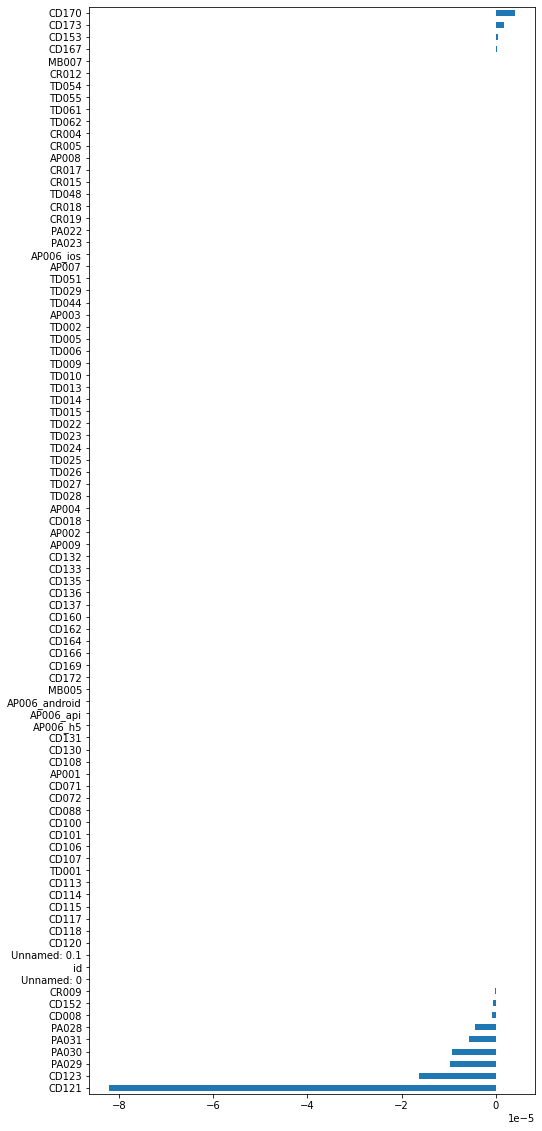

In [ ]:
imp_coef = coef.sort_values()
import matplotlib 
matplotlib.rcParams['figure.figsize'] = (8.0, 20.0)
imp_coef.plot(kind = "barh")

In [ ]:
coef[coef != 0].index

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'CR009', 'PA028', 'PA029', 'PA030',
       'PA031', 'CD008', 'CD121', 'CD123', 'CD152', 'CD153', 'CD167', 'CD170',
       'CD173'],
      dtype='object')

Only using these 16 variables, then delete unnamed & id which left 13 variables

In [ ]:
loan_data4 = loan_data3[['loan_default','CR009', 'PA028', 'PA029', 'PA030',
       'PA031', 'CD008', 'CD121', 'CD123', 'CD152', 'CD153', 'CD167', 'CD170',
       'CD173']]

loan_data4.head(5)

,loan_default,CR009,PA028,PA029,PA030,PA031,CD008,CD121,CD123,CD152,CD153,CD167,CD170,CD173
0,1,35807,3257.0,2872.0,3257.0,4739.0,13840.0,125.0,103.0,10900.0,12757.0,0.0,1449.0,2249.0
1,0,7254,3257.0,2872.0,3257.0,4739.0,651174.0,2106.0,1199.0,1285469.0,2617892.0,29664.0,54651.0,87312.0
2,0,30377,3257.0,2872.0,3257.0,4739.0,2454.0,23.0,21.0,3807.0,2314.0,0.0,0.0,110.0
3,0,0,3257.0,2872.0,3257.0,4739.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,3257.0,2872.0,3257.0,4739.0,651174.0,2106.0,1199.0,1285469.0,2617892.0,29664.0,54651.0,87312.0


In [ ]:
from sklearn.model_selection import train_test_split
train3, test3 = train_test_split(
     loan_data4, test_size=0.40, random_state=42)

In [ ]:
train_smp3 = train3.sample(frac=0.1, random_state=1)
test_smp3 = test3.sample(frac=0.1, random_state=1)
train_hex3 = h2o.H2OFrame(train_smp3)
test_hex3 = h2o.H2OFrame(test_smp3)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
train_hex33 = h2o.H2OFrame(train3)
test_hex33 = h2o.H2OFrame(test3)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
var3 = pd.DataFrame(train3.dtypes).reset_index()
var3.columns = ['varname','dtype'] 
var3['source'] = var3['varname'].str[:2]

var3['source'].value_counts()

CD    8
PA    4
CR    1
lo    1
Name: source, dtype: int64

In [ ]:
CR_list = list(var3[var3['source']=='CR']['varname'])
PA_list = list(var3[var3['source']=='PA']['varname'])
CD_list = list(var3[var3['source']=='CD']['varname'])

In [ ]:
predictors2 = CR_list + CD_list + PA_list

#GLM

## Start with using all variables

### benchmark

In [ ]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [ ]:
glm_v1 = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0.05) #, compute_p_values = True)
glm_v1.train(predictors,target,training_frame=train_hex22)

/usr/local/lib/python3.6/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [TD054, TD051, TD062, TD061, CR012, TD029, TD028, TD027, TD026, TD048, TD025, TD044, TD055]
  warnings.warn(mesg["message"], RuntimeWarning)


glm Model Build progress: |███████████████████████████████████████████████| 100%


In [ ]:
glm_v1.predict(test_hex22)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.792482,0.207518
1,0.801945,0.198055
0,0.826475,0.173525
0,0.827784,0.172216
0,0.828533,0.171467
1,0.79072,0.20928
0,0.825058,0.174942
1,0.773909,0.226091
0,0.826605,0.173395
0,0.842324,0.157676


In [ ]:
glm_v1.predict(test_hex22)['p1']

glm prediction progress: |████████████████████████████████████████████████| 100%


p1
0.207518
0.198055
0.173525
0.172216
0.171467
0.20928
0.174942
0.226091
0.173395
0.157676


In [ ]:
predictions = glm_v1.predict(test_hex22)['p1']
test_scores = test_hex22['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()

glm prediction progress: |████████████████████████████████████████████████| 100%


,loan_default,p1
0,0,0.207518
1,0,0.198055
2,0,0.173525
3,0,0.172216
4,0,0.171467


In [ ]:
def createGains(model):
    predictions = model.predict(test_hex22)['p1']
    test_scores = test_hex22['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='p1',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10 
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

createGains(glm_v1)

glm prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,103,217,320,103,217,0.17,0.08,60.0,1.72,9.0,32.19
1,320,76,244,640,179,461,0.30,0.18,120.0,1.49,12.0,27.97
2,320,74,246,960,253,707,0.42,0.27,180.0,1.41,15.0,26.35
3,320,78,242,1280,331,949,0.55,0.36,240.0,1.38,19.0,25.86
4,320,55,265,1600,386,1214,0.64,0.47,300.0,1.29,17.0,24.12
5,320,57,263,1920,443,1477,0.74,0.57,360.0,1.23,17.0,23.07
6,320,43,277,2240,486,1754,0.81,0.67,420.0,1.16,14.0,21.70
7,320,49,271,2560,535,2025,0.89,0.78,480.0,1.11,11.0,20.90
8,320,43,277,2880,578,2302,0.96,0.89,540.0,1.07,7.0,20.07


In [ ]:
def ROC_AUC(my_result,df,target):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df)['p1'].as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)
    
    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')
    
    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

glm prediction progress: |████████████████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



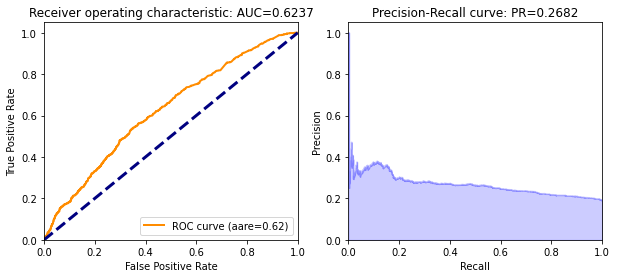

In [ ]:
ROC_AUC(glm_v1,test_hex22,'loan_default')

In [ ]:
# Print the Coefficients table
coefs = glm_v1._model_json['output']['coefficients_table'].as_data_frame()
coefs = pd.DataFrame(coefs)
coefs.sort_values(by='standardized_coefficients',ascending=False)

,names,coefficients,standardized_coefficients
14,TD013,0.021310,0.104039
4,AP004,0.038099,0.083837
10,TD005,0.021215,0.057565
12,TD009,0.009846,0.037753
8,TD001,0.005362,0.009584
...,...,...,...
27,PA022,0.000000,0.000000
26,CR019,0.000000,0.000000
25,CR018,0.000000,0.000000
3,AP003,-0.018665,-0.022141


### Grid Search

In [ ]:
param = { 'alpha': [x * 0.01 for x in range(0,11)]}

In [ ]:
from h2o.grid.grid_search import H2OGridSearch

In [ ]:
h20_grid = H2OGridSearch(
model = H2OGeneralizedLinearEstimator(family = 'binomial'),
hyper_params = param, 
search_criteria = {'strategy': "Cartesian"},
grid_id = 'glm_grid1'
)

In [ ]:
h20_grid.train(
x=predictors,y=target,training_frame=train_hex22,
lambda_search = True # model parameter than we want to prefix! 
)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [ ]:
h20_grid.get_grid(sort_by='auc', decreasing=True)

       alpha           model_ids                 auc
0      [0.0]   glm_grid1_model_1  0.7050734699356882
1      [0.1]  glm_grid1_model_11  0.7037930361695519
2     [0.09]  glm_grid1_model_10  0.7036960508487496
3     [0.08]   glm_grid1_model_9  0.7035727571931254
4     [0.07]   glm_grid1_model_8  0.7035100438111989
5     [0.06]   glm_grid1_model_7   0.703375657992785
6     [0.05]   glm_grid1_model_6  0.7032527909588066
7     [0.04]   glm_grid1_model_5  0.7029999465300871
8     [0.03]   glm_grid1_model_4  0.7028207654388685
9     [0.02]   glm_grid1_model_3  0.7023558900522071
10    [0.01]   glm_grid1_model_2  0.7012089888611933


The best result of grid search is 0.7050734699356882. Next let's check the result under random grid search.

### random grid search

In [ ]:
params = {
   'alpha': [x * 0.01 for x in range(0,99)]
}

In [ ]:
search_criteria = {'strategy': 'RandomDiscrete',
                  'max_models': 30 # max of 30 models assessed
                  }
# creating the grid of GLM 
h2o_grid2 = H2OGridSearch(
model = H2OGeneralizedLinearEstimator(family = 'binomial'),
hyper_params = params,
search_criteria = search_criteria,
grid_id = 'glm_grid2')

In [ ]:
h2o_grid2.train(
x=predictors,y=target,training_frame=train_hex22,
lambda_search = True # model parameter than we want to prefix! 
)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [ ]:
h2o_grid2.get_grid(sort_by='auc', decreasing=True)

                      alpha           model_ids                 auc
0                    [0.96]  glm_grid2_model_24  0.7055057798700568
1      [0.9500000000000001]  glm_grid2_model_28  0.7054885727970112
2                    [0.98]  glm_grid2_model_10  0.7054855864454908
3                    [0.86]   glm_grid2_model_7  0.7054544430653505
4                     [0.9]  glm_grid2_model_25  0.7054473327045879
5                    [0.97]  glm_grid2_model_13  0.7054355295057219
6                    [0.76]  glm_grid2_model_23  0.7054231574779948
7      [0.8200000000000001]  glm_grid2_model_27  0.7054043861255814
8                    [0.72]  glm_grid2_model_15  0.7054018263957069
9                    [0.71]   glm_grid2_model_4  0.7053500629693549
10                   [0.66]   glm_grid2_model_6   0.705237008233229
11                    [0.6]  glm_grid2_model_29  0.7052112687272682
12                   [0.62]  glm_grid2_model_12   0.705193777239792
13     [0.5700000000000001]  glm_grid2_model_17 

The best model has AUC of 0.7055057798700568, which is higher than the result of grid search. Next let's find out the corresponding lift value.

In [ ]:
best = h2o_grid2.get_grid(sort_by='auc', decreasing=True)[0]

In [ ]:
best.train(predictors,target,training_frame=train_hex22)

/usr/local/lib/python3.6/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [TD054, TD051, TD062, TD061, CR012, TD029, TD028, TD027, TD026, TD048, TD025, TD044, TD055]
  warnings.warn(mesg["message"], RuntimeWarning)


glm Model Build progress: |███████████████████████████████████████████████| 100%


In [ ]:
best.predict(test_hex22)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict
0.398149
0.164598
0.262128
0.161633
0.135277
0.205918
0.289601
0.392503
0.110463
0.241292


In [ ]:
createGains(best)

glm prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,122,198,320,122,198,0.20,0.08,60.0,2.03,12.0,38.12
1,320,98,222,640,220,420,0.37,0.16,120.0,1.83,21.0,34.38
2,320,77,243,960,297,663,0.50,0.26,180.0,1.65,24.0,30.94
3,320,67,253,1280,364,916,0.61,0.35,240.0,1.52,26.0,28.44
4,320,68,252,1600,432,1168,0.72,0.45,300.0,1.44,27.0,27.00
5,320,60,260,1920,492,1428,0.82,0.55,360.0,1.37,27.0,25.62
6,320,42,278,2240,534,1706,0.89,0.66,420.0,1.27,23.0,23.84
7,320,31,289,2560,565,1995,0.94,0.77,480.0,1.18,17.0,22.07
8,320,23,297,2880,588,2292,0.98,0.88,540.0,1.09,10.0,20.42


The result is pretty good, but what if using only selected variables?

## Using selected variables by Lasso

### benchmark

In [ ]:
glm_v2 = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0.05) #, compute_p_values = True)
glm_v2.train(predictors2,target,training_frame=train_hex3)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [ ]:
glm_v2.predict(test_hex3)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.812213,0.187787
1,0.812213,0.187787
1,0.81179,0.18821
1,0.812213,0.187787
1,0.812213,0.187787
1,0.812213,0.187787
1,0.812213,0.187787
1,0.811786,0.188214
1,0.811816,0.188184
1,0.812213,0.187787


In [ ]:
def createGains(model):
    predictions = model.predict(test_hex3)['p1']
    test_scores = test_hex3['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='p1',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10 
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

createGains(glm_v2)

glm prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,82,238,320,82,238,0.14,0.09,60.0,1.37,5.0,25.62
1,320,70,250,640,152,488,0.25,0.19,120.0,1.27,6.0,23.75
2,320,73,247,960,225,735,0.38,0.28,180.0,1.25,10.0,23.44
3,320,56,264,1280,281,999,0.47,0.38,240.0,1.17,9.0,21.95
4,320,61,259,1600,342,1258,0.57,0.48,300.0,1.14,9.0,21.38
5,320,48,272,1920,390,1530,0.65,0.59,360.0,1.08,6.0,20.31
6,320,49,271,2240,439,1801,0.73,0.69,420.0,1.05,4.0,19.60
7,320,51,269,2560,490,2070,0.82,0.80,480.0,1.02,2.0,19.14
8,320,53,267,2880,543,2337,0.90,0.90,540.0,1.01,0.0,18.85


glm prediction progress: |████████████████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



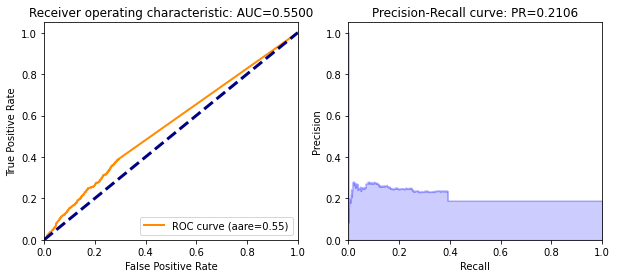

In [ ]:
ROC_AUC(glm_v2,test_hex3,'loan_default')

## Apparently, using selected variables by Lasso performs worse than using all variables. Next step is to apply the best model on all data instead of a small portion.

In [ ]:
best.train(predictors,target,training_frame=train_hex222)

/usr/local/lib/python3.6/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [TD054, TD051, TD062, TD061, CR012, TD029, TD028, TD027, TD026, TD048, TD025, TD044, TD055]
  warnings.warn(mesg["message"], RuntimeWarning)


glm Model Build progress: |███████████████████████████████████████████████| 100%


In [ ]:
best.predict(test_hex222)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict
0.144922
0.135753
0.0598259
0.237066
0.422766
0.139668
0.515701
0.231834
0.236572
0.0810054


# AutoML

In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml_v1 = H2OAutoML(max_runtime_secs = 60, max_models=20, seed=1)
aml_v1.train(predictors,target,training_frame=train_hex22)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
aml_v1.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20201124_015011,0.14475,0.38046,0.14475,0.290124,0.267037
StackedEnsemble_AllModels_AutoML_20201124_015011,0.144781,0.380501,0.144781,0.289879,0.267102
GLM_1_AutoML_20201124_015011,0.145142,0.380975,0.145142,0.292175,0.267073
GBM_grid__1_AutoML_20201124_015011_model_1,0.149324,0.386424,0.149324,0.297405,0.271533
GBM_4_AutoML_20201124_015011,0.151133,0.388758,0.151133,0.302781,0.272459
GBM_2_AutoML_20201124_015011,0.151294,0.388965,0.151294,0.303697,0.272732
GBM_5_AutoML_20201124_015011,0.151324,0.389004,0.151324,0.30388,0.272719
GBM_grid__1_AutoML_20201124_015011_model_2,0.151454,0.389171,0.151454,0.303718,0.272894
GBM_3_AutoML_20201124_015011,0.151585,0.38934,0.151585,0.30346,0.272992
GBM_1_AutoML_20201124_015011,0.151968,0.38983,0.151968,0.304345,0.273424


In [ ]:
pred = aml_v1.predict(test_hex22)
pred.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict
0.267052
0.142469
0.148546
0.192658
0.118979
0.247798
0.2239
0.347258
0.113228
0.211364


In [ ]:
perf = aml_v1.leader.model_performance(test_hex22)
perf


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.14312925784507066
RMSE: 0.3783242760451286
MAE: 0.2886649362578111
RMSLE: 0.2655289832679062
R^2: 0.06048487158107463
Mean Residual Deviance: 0.14312925784507066
Null degrees of freedom: 3199
Residual degrees of freedom: 3195
Null deviance: 487.50055555552717
Residual deviance: 458.01362510422615
AIC: 2872.383713373058


In [ ]:
def createGains(model):
    predictions = model.predict(test_hex22)
    test_scores = test_hex22['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='predict',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10 
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

createGains(aml_v1)

stackedensemble prediction progress: |████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,320,122,198,320,122,198,0.20,0.08,60.0,2.03,12.0,38.12
1,320,96,224,640,218,422,0.36,0.16,120.0,1.82,20.0,34.06
2,320,79,241,960,297,663,0.50,0.26,180.0,1.65,24.0,30.94
3,320,70,250,1280,367,913,0.61,0.35,240.0,1.53,26.0,28.67
4,320,62,258,1600,429,1171,0.72,0.45,300.0,1.43,27.0,26.81
5,320,52,268,1920,481,1439,0.80,0.55,360.0,1.34,25.0,25.05
6,320,39,281,2240,520,1720,0.87,0.66,420.0,1.24,21.0,23.21
7,320,40,280,2560,560,2000,0.93,0.77,480.0,1.17,16.0,21.88
8,320,32,288,2880,592,2288,0.99,0.88,540.0,1.10,11.0,20.56


The best models from AutoML and from GLM random grid search are having the same lift score